<a href="https://colab.research.google.com/github/Yong-Park/lab_2_cifrados/blob/main/bit_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Inciso 9**

In [ ]:
from PIL import Image
import base64
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def calculate_probabilities(data, n):
    # Obtener todos los n-gramas de la cadena de bits
    ngrams = [data[i:i+n] for i in range(len(data)-n+1)]

    # Calcular la frecuencia de cada n-grama
    frequency = Counter(ngrams)

    # Calcular la probabilidad de cada n-grama
    total_ngrams = len(ngrams)
    probabilities = {k: v / total_ngrams for k, v in frequency.items()}

    return probabilities

In [ ]:
def plot_histogram(probabilities, title):
    # Ordenar los n-gramas por clave antes de graficar
    sorted_probabilities = dict(sorted(probabilities.items()))

    # Obtener las etiquetas (n-gramas) y las probabilidades
    labels = list(sorted_probabilities.keys())
    probs = list(sorted_probabilities.values())

    # Crear la gráfica de barras
    fig, ax = plt.subplots()
    ax.bar(labels, probs)
    ax.set_xlabel("N-gram")
    ax.set_ylabel("Probability")
    ax.set_title(title)
    ax.grid(True)
    plt.xticks(rotation=45)

    # Mostrar la gráfica
    plt.show()

In [ ]:
def image_to_bits(image):
    # Convertir la imagen a una cadena de bytes
    with open(image, "rb") as img_file:
        img_bytes = img_file.read()

    # Codificar la cadena de bytes en Base64
    base64_str = base64.b64encode(img_bytes).decode("utf-8")

    # Decodificar la cadena Base64 en una cadena de bits
    bit_string = ''.join(format(ord(char), '08b') for char in base64_str)

    return bit_string

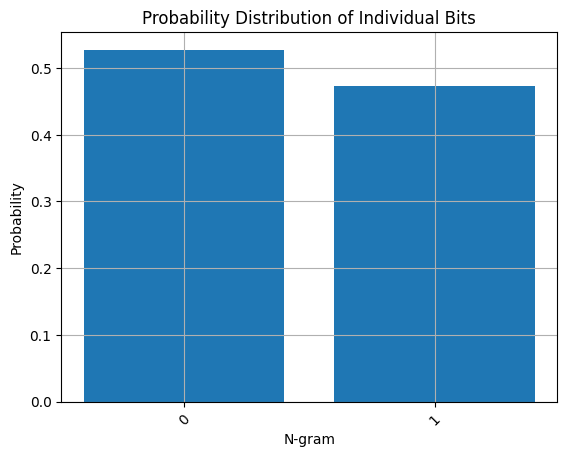

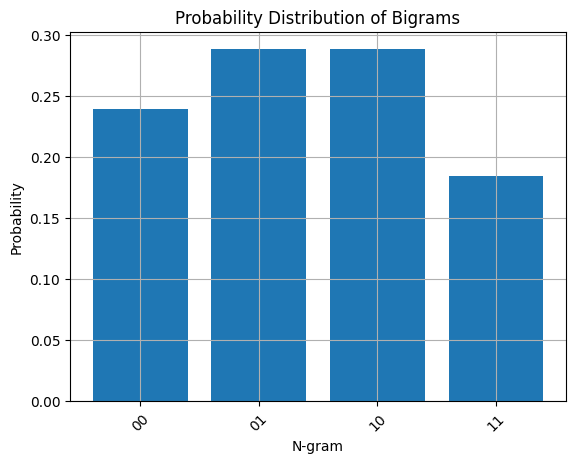

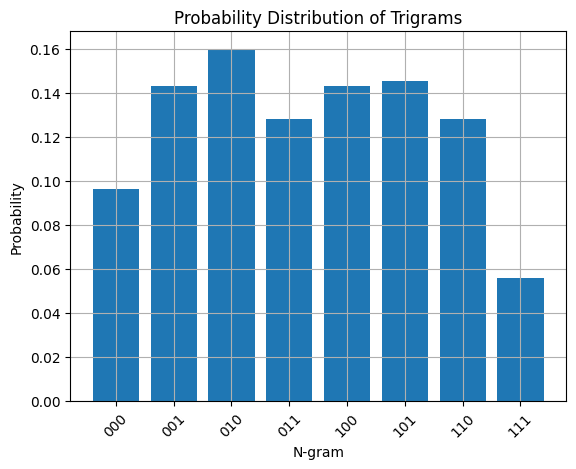

In [ ]:
# Ruta de la imagen de entrada
image_path = "/content/tux.png"

# Obtener la cadena de bits de la imagen
bit_string = image_to_bits(image_path)

# Calcular y mostrar la distribución de probabilidad para bits individuales
probabilities_bits = calculate_probabilities(bit_string, 1)
plot_histogram(probabilities_bits, "Probability Distribution of Individual Bits")

# Calcular y mostrar la distribución de probabilidad para bigramas (2-gramas)
probabilities_bigrams = calculate_probabilities(bit_string, 2)
plot_histogram(probabilities_bigrams, "Probability Distribution of Bigrams")

# Calcular y mostrar la distribución de probabilidad para trigramas (3-gramas)
probabilities_trigrams = calculate_probabilities(bit_string, 3)
plot_histogram(probabilities_trigrams, "Probability Distribution of Trigrams")